11:20:22 - cmdstanpy - INFO - Chain [1] start processing


date          0
DAU           0
MAU           0
stickiness    0
ds            0
y             0
dtype: int64
date          datetime64[ns]
DAU                    int64
MAU                    int64
stickiness           float64
ds            datetime64[ns]
y                    float64
dtype: object


11:20:22 - cmdstanpy - INFO - Chain [1] done processing


           ds
67 2025-08-31
68 2025-09-30
69 2025-10-31
70 2025-11-30
71 2025-12-31
           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
67 2025-08-31  12.921120   13.246717   13.567499    12.768229    13.088978   
68 2025-09-30  12.921126   14.620912   14.966284    12.758255    13.103468   
69 2025-10-31  12.921132   13.980684   14.351534    12.747334    13.118177   
70 2025-11-30  12.921137   13.774376   14.171753    12.735064    13.132393   
71 2025-12-31  12.921144   13.099934   13.526769    12.720253    13.147101   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
67        0.478459              0.478459              0.478459  0.478459   
68        1.862769              1.862769              1.862769  1.862769   
69        1.233359              1.233359              1.233359  1.233359   
70        1.039367              1.039367              1.039367  1.039367   
71        0.379586              0.379586              0.379586  0.3

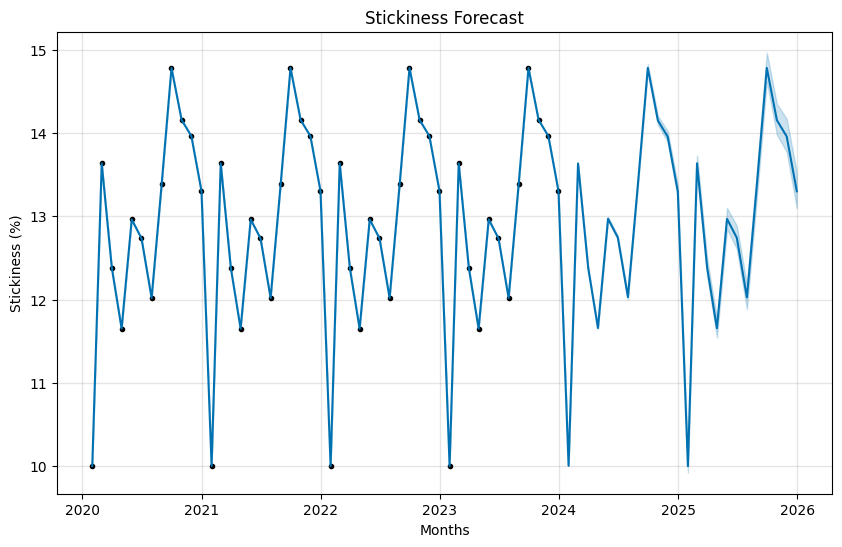

2025 Forecasted Stickiness:
Predicted: 12.92%
Upper Bound: 13.07%
Lower Bound: 12.78%


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', end='2023-12-31', freq='M'),
    'DAU': [100, 150, 130, 120, 140, 135, 125, 150, 170, 160, 155, 145]*4,
    'MAU': [1000, 1100, 1050, 1030, 1080, 1060, 1040, 1120, 1150, 1130, 1110, 1090]*4
}
df = pd.DataFrame(data)

# Calculate stickiness as a percentage
df['stickiness'] = (df['DAU'] / df['MAU']) * 100
df['ds'] = df['date']
df['y'] = df['stickiness']

# Check for missing values and data types
print(df.isnull().sum())
print(df.dtypes)

# Initialize and fit the model
model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
model.fit(df[['ds', 'y']])

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=24, freq='M')  # Forecast for the next 24 months (2 years)
print(future.tail())  # Check the future dataframe to ensure it includes dates for 2025

# Generate the forecast
forecast = model.predict(future)

# Check the forecast dataframe to ensure it includes predictions for 2025
print(forecast.tail())

# Plot forecast
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.set_title('Stickiness Forecast')
ax.set_xlabel('Months')
ax.set_ylabel('Stickiness (%)')
plt.show()

# Extracting predicted values and intervals for the year 2025
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
if not forecast_2025.empty:
    predicted_2025 = forecast_2025['yhat']
    upper_bound_2025 = forecast_2025['yhat_upper']
    lower_bound_2025 = forecast_2025['yhat_lower']

    print("2025 Forecasted Stickiness:")
    print(f"Predicted: {predicted_2025.mean():.2f}%")
    print(f"Upper Bound: {upper_bound_2025.mean():.2f}%")
    print(f"Lower Bound: {lower_bound_2025.mean():.2f}%")
else:
    print("No forecast data available for 2025.")


5     1
10    2
15    2
20    2
25    2
30    1
Name: active_days, dtype: int64


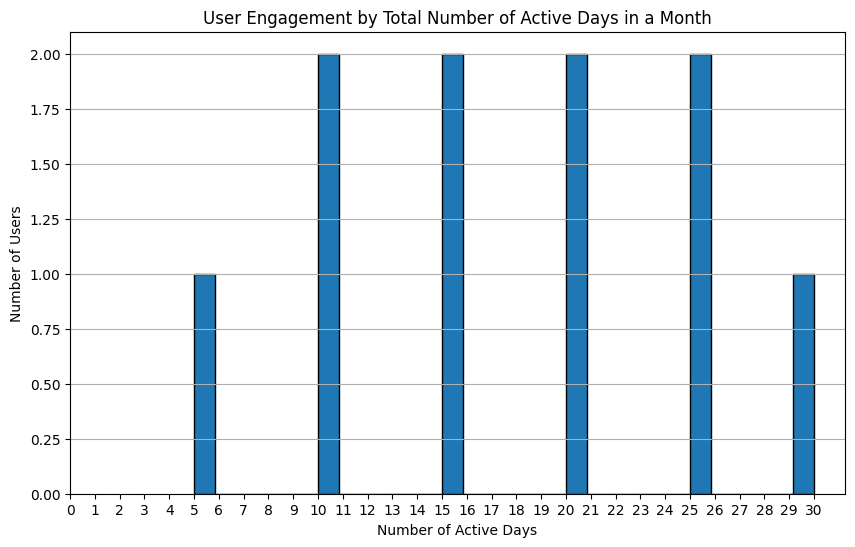

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data, replace with data fetched from your database
data = {'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'active_days': [5, 10, 15, 20, 25, 30, 10, 15, 20, 25]}

df = pd.DataFrame(data)

# Count the frequency of each number of active days
frequency_distribution = df['active_days'].value_counts().sort_index()
print(frequency_distribution)


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['active_days'], bins=30, edgecolor='black')
plt.title('User Engagement by Total Number of Active Days in a Month')
plt.xlabel('Number of Active Days')
plt.ylabel('Number of Users')
plt.xticks(range(0, 31, 1))  # Set x-ticks to display each day
plt.grid(axis='y')

# Show plot
plt.show()


In [3]:
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 8, 8, 9, 9, 10],
    'date': [
        '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-01', '2024-07-04',
        '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-01',
        '2024-07-01', '2024-07-02', '2024-07-01', '2024-07-03', '2024-07-04',
        '2024-07-01', '2024-07-01', '2024-07-04', '2024-07-01', '2024-07-03',
        '2024-07-02'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [4]:
df['date'] = pd.to_datetime(df['date'])

# Calculate the number of users active on each day
daily_activity = df['date'].value_counts().sort_index()
print(daily_activity)

2024-07-01    9
2024-07-02    4
2024-07-03    4
2024-07-04    4
Name: date, dtype: int64


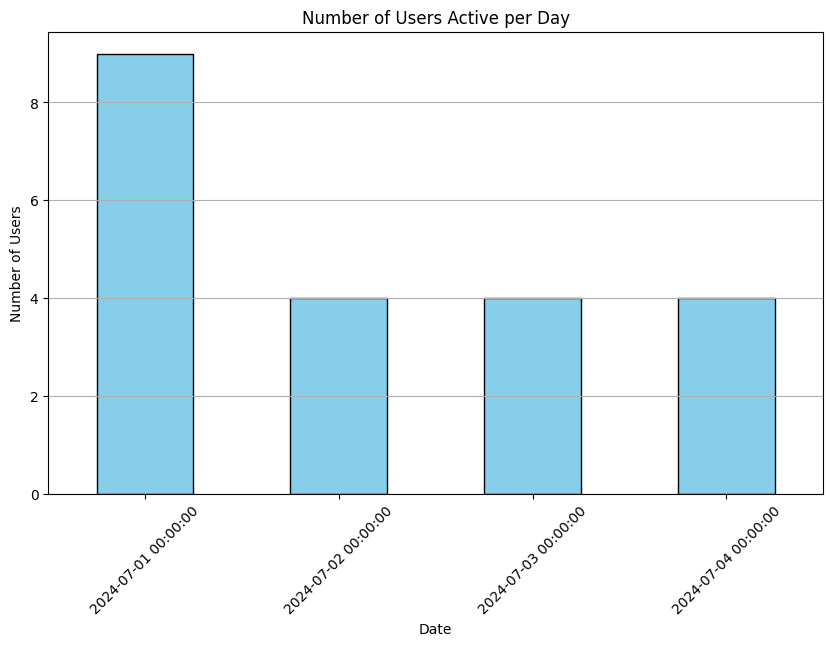

In [5]:
import matplotlib.pyplot as plt

# Plotting the daily activity
plt.figure(figsize=(10, 6))
daily_activity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Users Active per Day')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.show()